In [4]:
import pandas as pd 
#Load Iris dataset
fileURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
dfLenses = pd.read_csv(fileURL, names=["Age of the patient", "Spectacle prescription", "Astigmatic", "Tear production rate",
                                       "Type of lense"], header=None, delim_whitespace=True)
dfLenses.head()

,Age of the patient,Spectacle prescription,Astigmatic,Tear production rate,Type of lense
1,1,1,1,1,3
2,1,1,1,2,2
3,1,1,2,1,3
4,1,1,2,2,1
5,1,2,1,1,3


##### 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.


For this assignment the dataset chosen is for fitting contact lenses. Based on different attributes it is decided if the patient should be fitted with hard contact lenses, soft contact lenses or no contact lens. 

There are 4 features present in this dataset which are described below - 
1. Age of the patient - If the patient is young, pre-presbyopic or presbyopic.
2. Spectacle prescription - If the patient is myope (short-sighted person) or hypermetrope (far-sighted person)
3. Astigmatic - Yes or no, 
4. Tear production rate - Reduced or normal.

This is a small dataset which consists of 24 instances. 
Each instance is complete(all possible combinations of attribute-value pairs are represented) and correct. 
All 4 attributes are nominal in nature and the class is also nominal.

The class of the data is the 'Type of lense' which is also nominal. The class can have any of the 3 values - 
1. The patient should be fitted with hard contact lenses,
2. The patient should be fitted with soft contact lenses,
3. The patient should not be fitted with contact lenses

It is interesting to know that all the samples are not equally divided into these 3 classes. Majority of the samples lie in Class 3.


In [5]:
#Nature of data is described below:
dfLenses.describe()

,Age of the patient,Spectacle prescription,Astigmatic,Tear production rate,Type of lense
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.000000,1.500000,1.500000,1.500000,2.458333
std,0.834058,0.510754,0.510754,0.510754,0.779028
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,1.500000,1.500000,1.500000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,3.000000
max,3.000000,2.000000,2.000000,2.000000,3.000000


##### 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.


The dataset is complete and has no missing values in the dataset. 

All the features are nominal. 
All possible combinations of attribute-value pairs are represented

The class distribution is as follows:
1. hard contact lenses: 4 instances
2. soft contact lenses: 5 instances
3. no contact lenses: 15 instances


Populating the interactive namespace from numpy and matplotlib


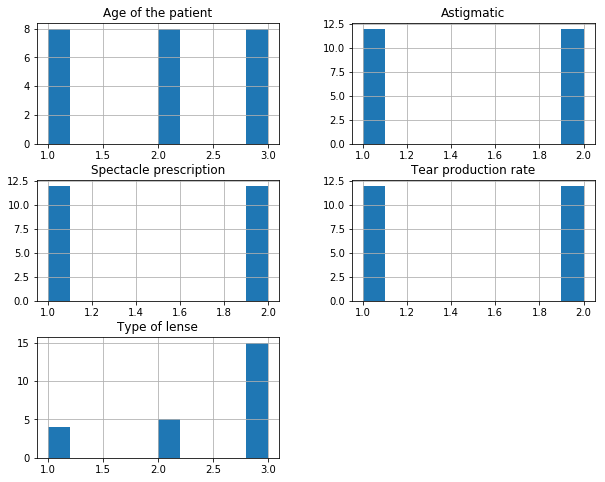

In [6]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
histdf = dfLenses.hist(figsize=(10,8))

##### 3. Using scikit-learns DecisionTreeClassiﬁer, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn

In [7]:
from sklearn.model_selection import train_test_split
x = dfLenses.values[:,0:4]
y = dfLenses.values[:,4:5]
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3)

#Model fitting
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [8]:
#Train accuracy
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train)
accuracy_score(y_train,y_train_pred)*100

100.0

In [9]:
#Test accuracy
y_test_pred = clf.predict(X_validation)
accuracy_score(y_validation,y_test_pred)*100

100.0

##### 4. The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.


In [10]:
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/aanch/Anaconda3/pkgs/graphviz-2.38.0-4/Library/bin/graphviz/'

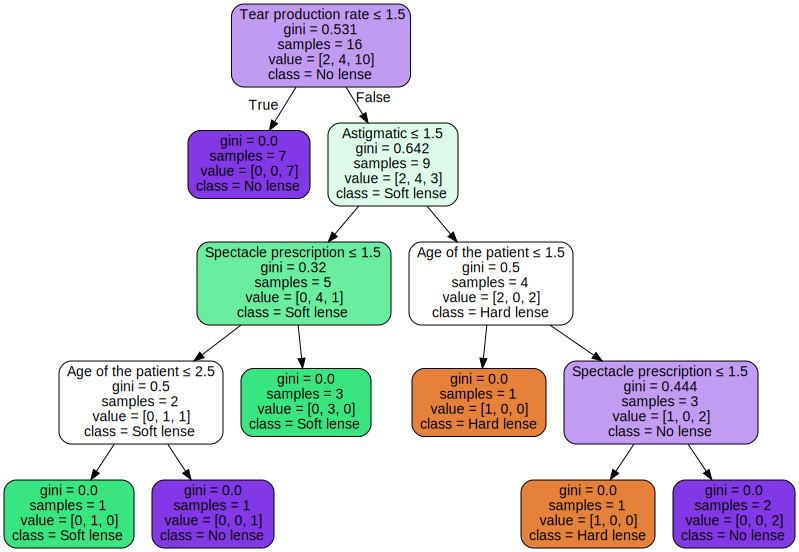

In [11]:
lensesFeature_names = ['Age of the patient', 'Spectacle prescription', 'Astigmatic', 'Tear production rate']
lensesTarget_names = ['Hard lense','Soft lense','No lense']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=lensesFeature_names,  
                         class_names=lensesTarget_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

##### 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that speciﬁc prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

A new instance is created with following values:
1. Age of the patient - Patient is young (Value is 1)
2. Spectacle prescription - Patient is hypermetrope (Value is 2)
3. Astigmatic - Yes (Value is 1)
4. Tear production rate - normal (Value is 2)


In [12]:
#Prediction of new instance
new_instance = [[1, 2, 1, 2]]
clf.predict(new_instance)

array([2], dtype=int64)

Using the tree as a reference, a brief description is given below on how the model created went about generating the prediction for the new instance:
At the first level, 'Tear production rate' has a value of 2 in the instance, which is greater than 1.5. So, we move to the right of the tree.
At the second level, 'Astigmatic' has a value of 1 in the instance, which is less than 1.5. So, we move to the left of the tree.
Here, all 4 samples are belonging to the class 'Soft lense' which is defined as class 2. Hence, the growt h of the tree stops here.
The predicted class is also 2 which matches the class traced by the tree. So this makes sense.

Since the prediction was accurate, there is no scope for improvement here, but we can try to improve the accuracy obtained for test data was 75%.

In [13]:
clf1 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=1, min_samples_split=2, 
                                   min_samples_leaf=1, min_weight_fraction_leaf=0, max_features=None, 
                                   random_state=100, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                   min_impurity_split=0.25, class_weight=None, presort=False)

clf1 = clf1.fit(X_train, y_train)

C:\Users\Animesh Mane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [14]:
y_train_pred1 = clf1.predict(X_train)
#y_train_pred
accuracy_score(y_train,y_train_pred1)*100

68.75

In [15]:
y_test_pred1 = clf1.predict(X_validation)
accuracy_score(y_validation,y_test_pred1)*100

75.0

Max Depth controls the maximum depth of the tree that will be created. It can also be described as the length of the longest path from the tree root to a leaf.
On changing the maximum depth to 1, the accuracy reduced on the train as well as test data. This might be because pruning the treecould avoid capturing all the details required for classification. This would be a bas learner. 
Also, increasing the max_depth of the tree to a very large value could lead to overfitting because in that case the smallest details are captured by the tree and hence it is not learning.

Therefore, accuracy can be improved by changing the hyperparameters but in this case, the best accuracy is obtained with the default parameters itself.